In [40]:
import matplotlib.pyplot as plt, numpy as np, numpy.random as npr, pystan as ps, matplotlib.pyplot as plt
from tqdm import trange
%matplotlib inline
from time import time
from pylab import plot, show, legend

In [2]:
sm = ps.StanModel(file="brain.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_388ad65a3dfea4092ebe64bea9b8beb4 NOW.


In [41]:
N = 21 
m = 68
p = 10
X = npr.binomial(1,0.2,size=[N,m,m]);

In [42]:
data = dict(N=N, p=p, m=m, a=0.5, X=X);

In [43]:
start = time()
fit = sm.sampling(data=data, thin=1, n_jobs=6, chains=6, iter=200, init="random")
print(round((time()-start)/60,2), "minutes to run")
print(fit)
trace = fit.extract()

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


684.38 minutes to run
Inference for Stan model: anon_model_388ad65a3dfea4092ebe64bea9b8beb4.
6 chains, each with iter=200; warmup=100; thin=1; 
post-warmup draws per chain=100, total post-warmup draws=600.

                     mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Z[1,1]              -0.03    0.03   0.19  -0.42  -0.16-7.6e-3    0.1   0.29     40   1.15
Z[2,1]               0.08    0.07   0.28  -0.38  -0.08   0.07    0.2   0.78     17   1.33
Z[3,1]                0.1    0.03   0.21  -0.44  -0.03   0.11   0.24   0.45     39   1.13
Z[4,1]               -0.1    0.03    0.2  -0.49  -0.25   -0.1   0.05   0.29     43   1.16
Z[5,1]               0.05    0.03   0.21  -0.31  -0.11   0.02    0.2   0.45     51   1.12
Z[6,1]              -0.05    0.03   0.21  -0.46   -0.2  -0.05   0.12   0.34     41   1.18
Z[7,1]              -0.09    0.06   0.23  -0.55  -0.24  -0.07   0.07   0.32     14    1.3
Z[8,1]              -0.02    0.03    0.2  -0.46  -0.15   0.01   0.12   0.

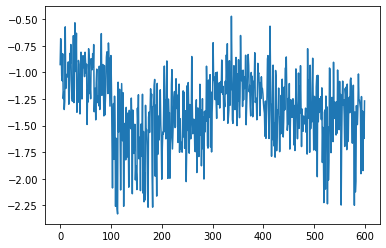

In [46]:
i, j = 1, 3
n = 20

π = trace['Z'][:,i,j] + \
         [trace['u'][idx,i].dot(np.diag(trace['lambda_diag'][idx,n])).dot(trace['u'][idx,j]) 
          for idx in range(np.shape(trace['u'])[0])]
plt.plot(π);